In [20]:
import numpy as np
import matplotlib.pyplot as plt
from DatasetGenerator import generate_dataset
import torch
np.random.seed(42)

# Generate Example

In [66]:
# seed=3
# torch.manual_seed(seed)
# torch.cuda.manual_seed(seed)
# torch.cuda.manual_seed_all(seed)
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
# np.random.seed(seed)
# print("Running on: " , device)

num_drones = 10
n_drone_clusters = 3
drone_cluster_split = np.random.uniform(0.0, 1.0, n_drone_clusters)
drone_cluster_split = drone_cluster_split / np.sum(drone_cluster_split)
num_facilities = 4
num_distinct_ends = 3
dim_ = 2
print(f"num_drones = {num_drones}\tnum_facilities = {num_facilities}\tdim = {dim_}")
# print(drone_cluster_split)
START_locs, F_base, END_locs = generate_dataset(
    num_drones, 
    n_drone_clusters, 
    drone_cluster_split, 
    num_facilities, 
    dim_, 
    device, 
    seed,
    drone_cluster_std_range=[0.02, 0.03], 
    F_noise_std=0.05,
    num_distinct_ends=num_distinct_ends
)

s = START_locs.cpu().numpy().reshape(-1,1,2)
e = END_locs.cpu().numpy().reshape(-1,1,2)
Y_init = F_base.detach().cpu().numpy()

# plot_UAV_FLPO(START_locs, END_locs, F_base, (12,10))
# # plot_UAV_FLPO_3D(START_locs, END_locs, F_base)

num_drones = 10	num_facilities = 4	dim = 2


In [64]:
# create a dataset of nodes and agents
# num_nodes = 10
# num_agents = 30
# dim = 2  # dimension of the space
# n_algo_iters = 10
# def generate_example(dim=2, num_nodes=30, num_agents=20):
#     nodes = 0.5 + 0.01 * np.random.randn(1, num_nodes, dim)  # centered at [0.5, 0.5] with small perturbation
#     s = np.random.rand(num_agents,1, dim)
#     e = np.random.rand(num_agents,1, dim)
#     return s, e, nodes
# s, e, Y_init = generate_example(num_nodes=num_facilities, num_agents=num_drones, dim=dim)

Text(0.5, 1.0, 'Nodes and Agents in 2D Space')

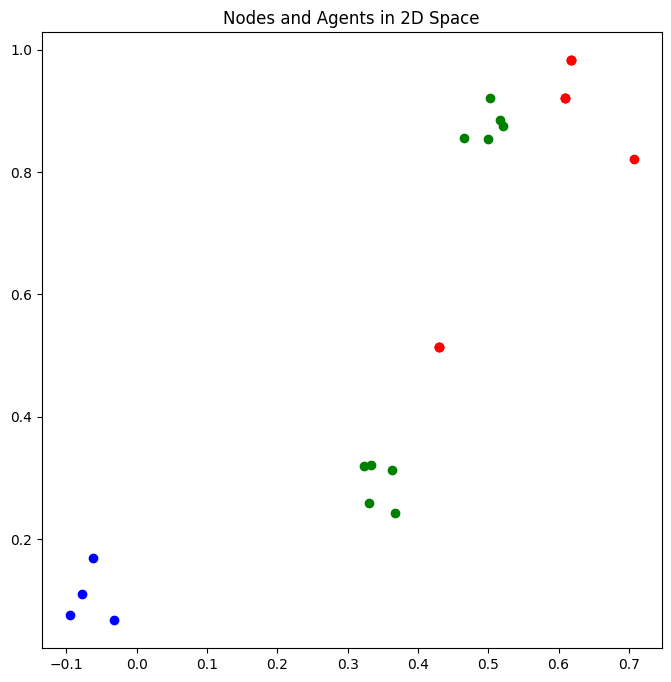

In [67]:

# plot the nodes and agents
plt.figure(figsize=(8, 8))
plt.scatter(Y_init[0, :, 0], Y_init[0, :, 1], c='blue', label='Nodes')
plt.scatter(s[:, 0, 0], s[:, 0, 1], c='green', label='Start Points')
plt.scatter(e[:, 0, 0], e[:, 0, 1], c='red', label='End Points')
plt.title('Nodes and Agents in 2D Space')

# PSO

Iter   0 | Best Cost: 6004.2939 | Mean Cost: 7935.7467
Iter 100 | Best Cost: 2002.2346 | Mean Cost: 2166.7530
Iter 200 | Best Cost: 2002.2328 | Mean Cost: 2004.2560
Iter 299 | Best Cost: 2002.2328 | Mean Cost: 2002.2351
Iter   0 | Best Cost: 5004.8652 | Mean Cost: 7577.9722
Iter 100 | Best Cost: 1002.1556 | Mean Cost: 1226.7880
Iter 200 | Best Cost: 1002.1487 | Mean Cost: 1004.2139
Iter 299 | Best Cost: 1002.1480 | Mean Cost: 1002.1503
Iter   0 | Best Cost: 6004.2531 | Mean Cost: 8007.8564
Iter 100 | Best Cost: 3002.2038 | Mean Cost: 3056.6213
Iter 200 | Best Cost: 3002.1714 | Mean Cost: 3002.1957
Iter 299 | Best Cost: 3002.1714 | Mean Cost: 3002.1742
Iter   0 | Best Cost: 5004.3715 | Mean Cost: 7803.8693
Iter 100 | Best Cost: 1002.0652 | Mean Cost: 1148.7734
Iter 200 | Best Cost: 1002.0520 | Mean Cost: 1002.0780
Iter 299 | Best Cost: 1002.0490 | Mean Cost: 1002.0517
Iter   0 | Best Cost: 4003.8580 | Mean Cost: 7415.7865
Iter 100 | Best Cost: 2002.0189 | Mean Cost: 2540.8561
Iter 200 |

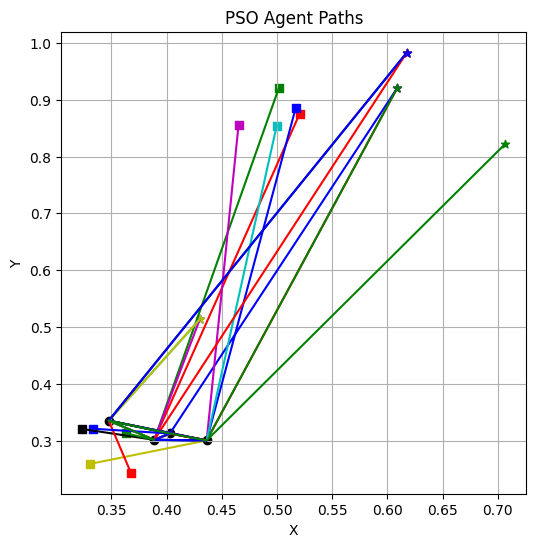

In [68]:
# run the PSO algorithm
from PSO import pso, pso_plot, pso_print

num_particles = 500
num_iters = 300
w = 0.9 # inertia weight
c1 = 0.5  # cognitive (individual) weight
c2 =1.5  # social (group) weight
t_pso_arr = []
c_pso_arr = []
for i in range(n_algo_iters):
    y_final, eta_final, global_best_cost, elapsed_time = pso(
        s0,
        e0,
        num_facilities,
        num_drones,
        dim,
        Y_init=Y_init,
        verbose=True,
        w=w,
        c1=c1,
        c2=c2,
        num_particles=num_particles,
        num_iters=num_iters,
    )
    t_pso_arr.append(elapsed_time)
    c_pso_arr.append(global_best_cost)

t_pso_min = np.min(t_pso_arr)
c_pso_min = np.min(c_pso_arr)
pso_print(y_final, eta_final, global_best_cost, elapsed_time, s, e)
pso_plot(y_final, eta_final, s, e)

In [69]:
t_pso_min, c_pso_min

(40.75912594795227, 1002.0490155552106)

# Genetic Algorithm

GA Solution:
Best Cost: 1.4023
Elapsed Time: 3.59s
Node positions (y):
  Node 0: [0.51475019 0.7305869 ]
  Node 1: [0.5535774  0.75462312]
  Node 2: [0.52138801 0.77693062]
  Node 3: [0.49620596 0.65381807]
Agent 0 path:
Node 0  -> Node 0  -> Node 0  -> Node 1  -> End
Agent 1 path:
Node 2  -> Node 2  -> Node 0  -> Node 2  -> End
Agent 2 path:
Node 2  -> Node 1  -> Node 1  -> Node 2  -> End
Agent 3 path:
Node 0  -> Node 0  -> Node 1  -> Node 0  -> End
Agent 4 path:
Node 2  -> Node 1  -> Node 1  -> Node 0  -> End
Agent 5 path:
Node 3  -> Node 0  -> Node 2  -> Node 1  -> End
Agent 6 path:
Node 3  -> Node 3  -> Node 0  -> Node 2  -> End
Agent 7 path:
Node 3  -> Node 3  -> Node 0  -> Node 0  -> End
Agent 8 path:
Node 3  -> Node 0  -> Node 1  -> Node 2  -> End
Agent 9 path:
Node 3  -> Node 3  -> Node 2  -> Node 1  -> End


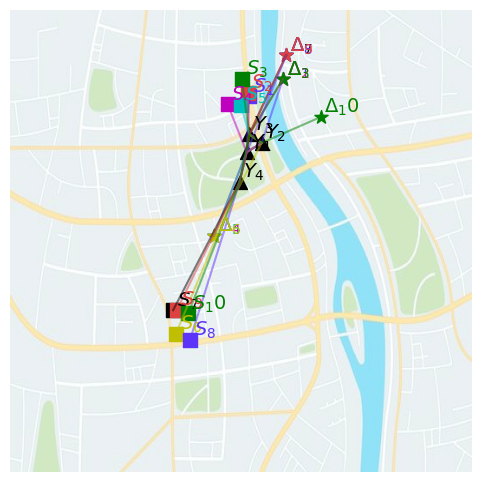

In [71]:
from GA import ga, ga_plot, ga_print
t_arr_ga = []
c_arr_ga = []
for i in range(n_algo_iters):
    best_y, best_eta, best_cost, elapsed_time = ga(
            s,
            e,
            num_facilities,
            num_drones,
            dim,
            Y_init=None,
            verbose=False,
            pop_size=100,
            generations=100,
            mutation_rate=0.3,        
        )
    t_arr_ga.append(elapsed_time)
    c_arr_ga.append(best_cost)
t_ga_min = np.min(t_arr_ga)
c_ga_min = np.min(c_arr_ga)
ga_print(s, e, best_y, best_eta, best_cost, elapsed_time)
ga_plot(s, e, best_y, best_eta)

In [72]:
t_ga_min, c_ga_min

(3.567441940307617, 1.2024065335093976)

# SA

Final solution:
Node positions (y):
  Node 0: [0.50496714 0.49861736]
  Node 1: [0.50647689 0.5152303 ]
  Node 2: [0.49765847 0.49765863]
  Node 3: [0.51579213 0.50767435]
Agent paths (eta):
  Agent 0: Node 2 -> Node 3 -> Node 2 -> Node 2 -> End
  Agent 1: Node 2 -> Node 3 -> Node 2 -> Node 0 -> End
Start positions (s):
  Agent 0: [0.02058449 0.96990985]
  Agent 1: [0.83244264 0.21233911]
End positions (e):
  Agent 0: [0.18182497 0.18340451]
  Agent 1: [0.30424224 0.52475643]


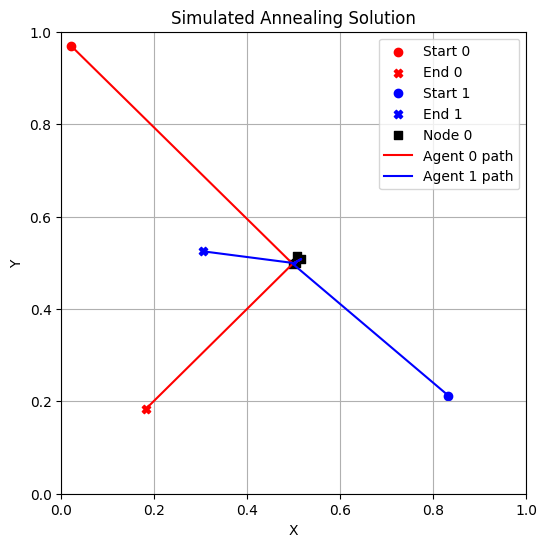

In [6]:
from SA import sa, plot_sa, print_sa
best_y, best_eta, best_cost, elapsed_time = sa(
        s,
        e,
        num_nodes,
        num_agents,
        dim,
        Y_init=Y_init,
        YMIN=0,
        YMAX=1.0,
        iters=1000,
        verbose=False,
    )
print_sa(s, e, best_y, best_eta)
plot_sa(s, e, best_y, best_eta)

# CEM

CEM Solution:
Best Cost: 0.4038
Elapsed Time: 2.29 seconds
Node positions (y):
[[0.56621962 0.36857567]
 [0.08523684 0.70752065]
 [0.34325522 0.12249072]
 [0.14777926 0.44534207]]
Agent paths (indices):
Agent 0: Node 1 -> Node 1 -> Node 3 -> End -> End
Agent 1: Node 0 -> End -> End -> End -> End


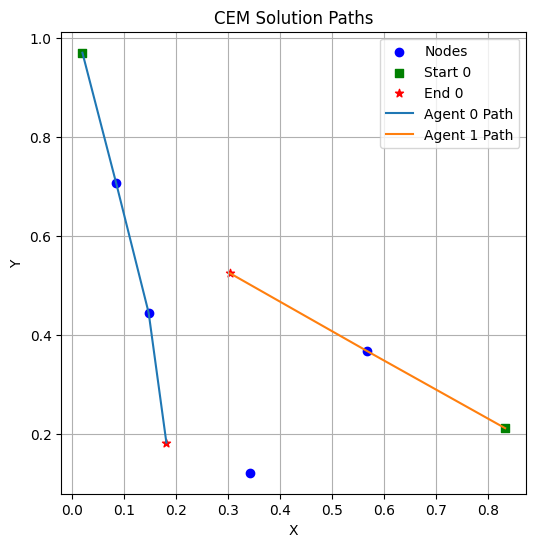

In [7]:
from CEM import cem, plot_cem, print_cem
best_y, best_eta, best_cost, elapsed_time = cem(
        s,
        e,
        num_nodes,
        num_agents,
        dim,
        Y_init=Y_init,
        YMIN=0,
        YMAX=1.0,
        n_iter=100,
        pop_size=100,
        elite_frac=0.2,
        verbose=False,
    )
print_cem(s, e, best_y, best_eta, best_cost, elapsed_time)
plot_cem(s, e, best_y, best_eta)

# ACO

Iter   0 | Best Cost: 1000.8731
Iter  50 | Best Cost: 0.8322
Iter 100 | Best Cost: 0.8322
Iter 150 | Best Cost: 0.7730
Iter 199 | Best Cost: 0.7730
Best Cost: 0.7730, Time: 4.45s
Optimal node locations:
Node 0: [0.33242205 0.25018999]
Node 1: [0.29325502 0.38001653]
Node 2: [0.25845822 0.45879661]
Node 3: [0.37997818 0.2700028 ]

Agent 0: node 2 -> node 1 -> node 3 -> node 0
Agent 1: node 0 -> node 1 -> node 2 -> node 3


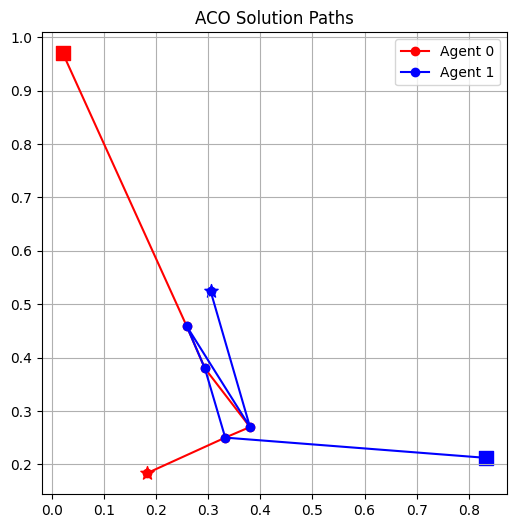

In [8]:
from ACO import aco, plot_aco, print_aco
best_y, best_eta, best_cost, elapsed_time = aco(
    s,
    e,
    num_nodes,
    num_agents,
    dim,
    Y_init=Y_init,
    YMIN=0.0,
    YMAX=1.0,
    num_iters=200,
    num_ants=100,
    alpha=1.0,
    beta=1.0,
    rho=0.5,
    Q=1.0,
    verbose=True,
)
print_aco(s, e, num_nodes, num_agents, dim, best_y, best_eta)
plot_aco(s, e, num_nodes, num_agents, dim, best_y, best_eta)

# Results